 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

#classes = (<перечислите классы как строки>)
classes = {0:"T-shirt",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
testloader.dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
trainloader.dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
from collections import Counter
train_classes = [label for _, label in trainset]
Counter(train_classes)
testset_C = [label for _, label in testset]
Counter(testset_C)

Counter({0: 1000,
         1: 1000,
         2: 1000,
         3: 1000,
         4: 1000,
         5: 1000,
         6: 1000,
         7: 1000,
         8: 1000,
         9: 1000})

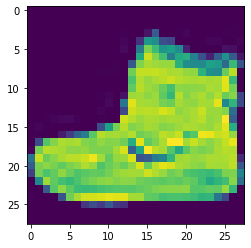

In [ ]:
plt.imshow(trainloader.dataset.data[0]);

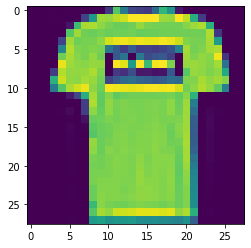

In [ ]:
plt.imshow(trainloader.dataset.data[1]);


'Shirt'

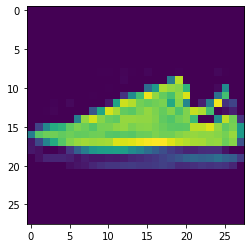

In [ ]:
plt.imshow(trainloader.dataset.data[6]);
display(trainloader.dataset.classes[6])

###**MLP**

In [ ]:
import tensorflow as tf
X_test = tf.convert_to_tensor(testset.data.reshape(10000, 28, 28, 1).numpy())
X_train = tf.convert_to_tensor(trainset.data.reshape(60000, 28, 28, 1).numpy())
y_test = tf.convert_to_tensor(testset.targets.numpy())
y_train = tf.convert_to_tensor(trainset.targets.numpy())

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Model
MLP = Sequential()

MLP.add(Flatten())
MLP.add(Dense(64, activation='relu'))
MLP.add(Dense(256, activation='relu'))
MLP.add(Dense(128, activation='relu'))
MLP.add(Dense(32, activation='relu'))
MLP.add(Dense(10, activation='softmax'))
MLP.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

In [ ]:
history_MLP=MLP.fit(X_train, y_train,epochs = 8, batch_size=128,validation_data=(X_test,y_test))

Epoch 1/8
469/469 [==============================] - 5s 5ms/step - loss: 1.3208 - accuracy: 0.7311 - val_loss: 0.6206 - val_accuracy: 0.7873
Epoch 2/8
469/469 [==============================] - 2s 4ms/step - loss: 0.5258 - accuracy: 0.8149 - val_loss: 0.5298 - val_accuracy: 0.8058
Epoch 3/8
469/469 [==============================] - 2s 4ms/step - loss: 0.4503 - accuracy: 0.8377 - val_loss: 0.4673 - val_accuracy: 0.8355
Epoch 4/8
469/469 [==============================] - 2s 4ms/step - loss: 0.4110 - accuracy: 0.8507 - val_loss: 0.4468 - val_accuracy: 0.8409
Epoch 5/8
469/469 [==============================] - 2s 4ms/step - loss: 0.3903 - accuracy: 0.8583 - val_loss: 0.4554 - val_accuracy: 0.8423
Epoch 6/8
469/469 [==============================] - 2s 4ms/step - loss: 0.3701 - accuracy: 0.8639 - val_loss: 0.4299 - val_accuracy: 0.8503
Epoch 7/8
469/469 [==============================] - 2s 4ms/step - loss: 0.3564 - accuracy: 0.8690 - val_loss: 0.4047 - val_accuracy: 0.8517
Epoch 8/8
469

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


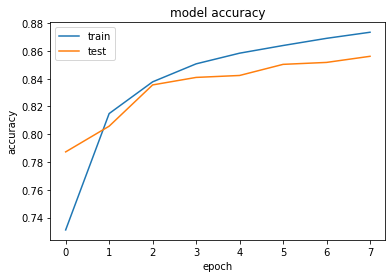

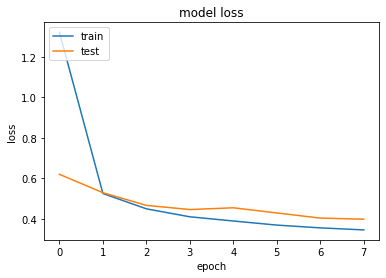

In [ ]:
print(history_MLP.history.keys())
# summarize history for accuracy
plt.plot(history_MLP.history['accuracy'])
plt.plot(history_MLP.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
MLP.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8561


[0.39917075634002686, 0.8561000227928162]

###CNN на Keras

In [ ]:
import tensorflow as tf
X_test = tf.convert_to_tensor(testset.data.reshape(10000, 28, 28, 1).numpy())
X_train = tf.convert_to_tensor(trainset.data.reshape(60000, 28, 28, 1).numpy())
y_test = tf.convert_to_tensor(testset.targets.numpy())
y_train = tf.convert_to_tensor(trainset.targets.numpy())

In [ ]:
input_size = X_train[0].shape
print(input_size)

(28, 28, 1)


In [ ]:
from keras.layers import RandomFlip, RandomRotation, Rescaling,Resizing
from tensorflow.keras import regularizers

In [ ]:
resize_and_rescale = tf.keras.Sequential([
 Resizing(28, 28),
 Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,LocallyConnected2D, DepthwiseConv2D

# Model
model = Sequential()
#model.add(resize_and_rescale)
#model.add(RandomRotation(0.2))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=input_size,))
model.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=input_size))
model.add(Conv2D(128, 
                 kernel_size=(8, 8), 
                 padding='same',
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(5, 5),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=input_size))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(5, 5),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=input_size))
#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train,epochs = 8, batch_size=128,validation_data=(X_test,y_test))

Epoch 1/8
469/469 [==============================] - 112s 208ms/step - loss: 0.7182 - accuracy: 0.7566 - val_loss: 0.5164 - val_accuracy: 0.8151
Epoch 2/8
469/469 [==============================] - 92s 197ms/step - loss: 0.3468 - accuracy: 0.8765 - val_loss: 0.3550 - val_accuracy: 0.8768
Epoch 3/8
469/469 [==============================] - 92s 197ms/step - loss: 0.2866 - accuracy: 0.8987 - val_loss: 0.2882 - val_accuracy: 0.9043
Epoch 4/8
469/469 [==============================] - 93s 197ms/step - loss: 0.2577 - accuracy: 0.9099 - val_loss: 0.2460 - val_accuracy: 0.9163
Epoch 5/8
469/469 [==============================] - 93s 197ms/step - loss: 0.2349 - accuracy: 0.9164 - val_loss: 0.2746 - val_accuracy: 0.9127
Epoch 6/8
469/469 [==============================] - 92s 197ms/step - loss: 0.2218 - accuracy: 0.9220 - val_loss: 0.2484 - val_accuracy: 0.9190
Epoch 7/8
469/469 [==============================] - 92s 197ms/step - loss: 0.1998 - accuracy: 0.9304 - val_loss: 0.2550 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


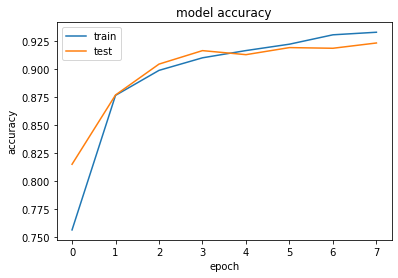

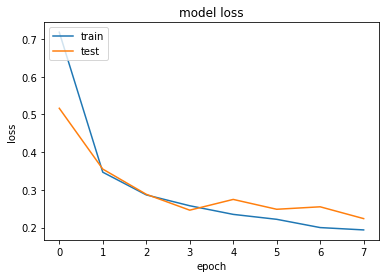

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 10s 29ms/step - loss: 0.2236 - accuracy: 0.9232


[0.2236470878124237, 0.9232000112533569]

In [ ]:
y_predict = model.predict(X_test)
y_predict_classes = np.argmax(y_predict, axis = 1)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Эта функция выводит confusion matrix.
    Нормализация может быть добавлена изменением значения флага 
    `normalize` на `True`
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

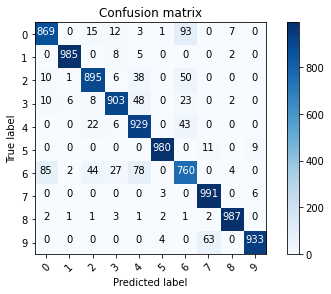

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test,y_predict_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


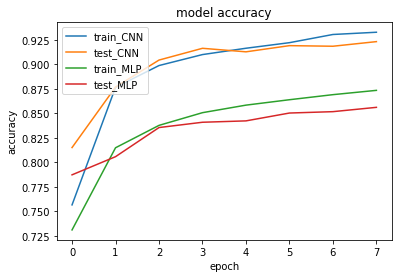

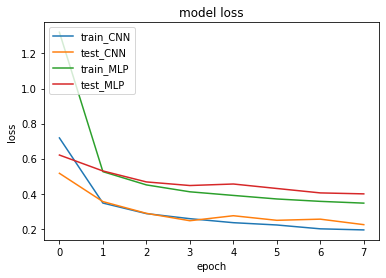

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_MLP.history['accuracy'])
plt.plot(history_MLP.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_CNN', 'test_CNN','train_MLP','test_MLP'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_CNN', 'test_CNN','train_MLP','test_MLP'], loc='upper left')
plt.show()
print(history_MLP.history.keys())


CNN дал больший accuracy чем MLP, но в CNN значительно большее количество слоев и параметров. То же самое со значениями loss. Помимо этого в CNN используется сверточные слои, которые успешнее работают с изображениями, соответственно точность больше. Игрался с разными слоями включая GlobalAveragePooling2D,LocallyConnected2D, DepthwiseConv2D, но простой CONV2d показал все равно лучшую точность.